# WordNet
Lexical database   
Synsets = sets of cognitive synonyms   
Relations of synsets: (hyperonymy, hyponymy and ISA relations)

[Homepage](https://wordnet.princeton.edu/)

## Using NLTK to handle WordNet

In [ ]:
from nltk.corpus import wordnet as wn
import nltk
import locale
locale.getpreferredencoding = lambda: "UTF-8"

nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


True

In [ ]:
#Looking up a word
sets = wn.synsets("language")
print(sets)

[Synset('language.n.01'), Synset('speech.n.02'), Synset('lyric.n.01'), Synset('linguistic_process.n.02'), Synset('language.n.05'), Synset('terminology.n.01')]


In [ ]:
#Specify POS

sets = wn.synsets("lock", wn.VERB)
print(sets)

[Synset('lock.n.01'), Synset('lock.n.02'), Synset('lock.n.03'), Synset('lock.n.04'), Synset('lock.n.05'), Synset('lock.n.06')]


In [ ]:
#Analyze synsets and lemmas
sets = wn.synsets("language")
for synset in sets:
  print(synset.definition().ljust(90), synset.examples()[0])
  lemmas=synset.lemmas()
  for lemma in lemmas:
    print(str(lemma.name()), lemma.count(), end=", ")
  print("\n")

a systematic means of communicating by the use of sounds or conventional symbols           he taught foreign languages
language 48, linguistic_communication 0, 

(language) communication by word of mouth                                                  his speech was garbled
speech 7, speech_communication 0, spoken_communication 0, spoken_language 2, language 5, voice_communication 0, oral_communication 0, 

the text of a popular song or musical-comedy number                                        his compositions always started with the lyrics
lyric 12, words 8, language 2, 

the cognitive processes involved in producing and understanding linguistic communication   he didn't have the language to express his feelings
linguistic_process 0, language 1, 

the mental faculty or power of vocal communication                                         language sets homo sapiens apart from all other animals
language 1, speech 0, 

a system of words used to name things in a particular discipline  

In [ ]:
# Multi-language support
nltk.download('omw')

wn.langs()

[nltk_data] Downloading package omw to /root/nltk_data...


['eng']

In [ ]:
wn.synset('police.n.01').lemma_names('spa')

['guardia', 'policía']

In [ ]:
wn.synset('police.n.01').lemma_names('jpn')

['お回り',
 'お巡り',
 'さつ',
 'その筋',
 'サツ',
 'ポリス',
 '其の筋',
 '其筋',
 '刑事警察',
 '官憲',
 '察',
 '巡査',
 '御回',
 '御回り',
 '御巡',
 '御巡り',
 '警官',
 '警官隊',
 '警察',
 '警察当局',
 '警察隊']

## Easier access with morphy
Utilizes ending rules and exceptions for lemmatization

In [ ]:
wn.morphy('locking', pos=wn.NOUN)

'locking'

In [ ]:
wn.morphy('locking', pos=wn.VERB)

'lock'

In [ ]:
wn.synsets("locking")

[Synset('locking.n.01'),
 Synset('lock.v.01'),
 Synset('engage.v.10'),
 Synset('lock.v.03'),
 Synset('lock.v.04'),
 Synset('interlock.v.03'),
 Synset('lock.v.06'),
 Synset('lock_in.v.02'),
 Synset('lock.v.08'),
 Synset('lock.v.09')]

## Antonyms and synonyms



In [ ]:
cold = wn.synset("cold.a.01").lemmas()[0]
print(cold.name())
print([lemma.name() for lemma in cold.antonyms()])

cold
['hot']


In [ ]:
#Pertainyms -> pertain 
synset = wn.synset("lingual.a.01").lemmas()[0]
print(synset.name())
print([lemma.name() for lemma in synset.pertainyms()])

linguistic
['language']


In [ ]:
wn.synsets("pertain")

[Synset('refer.v.02'), Synset('pertain.v.02')]

In [ ]:
wn.lemma("icy.a.01.frigid").derivationally_related_forms()

[Lemma('coldness.n.02.frigidness'), Lemma('coldness.n.02.frigidity')]

In [ ]:
#Synonyms
set([lemma.name() for synset in wn.synsets("icy") for lemma in synset.lemmas()])

{'arctic',
 'frigid',
 'frosty',
 'frozen',
 'gelid',
 'glacial',
 'icy',
 'polar',
 'wintry'}

## Synset relations

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/b/b4/Hyponym_and_hypernym.svg/1200px-Hyponym_and_hypernym.svg.png" width=60%>

In [ ]:
dog = wn.synset("dog.n.01")
dog.hypernyms()

[Synset('canine.n.02'), Synset('domestic_animal.n.01')]

In [ ]:
wn.synset("domestic_animal.n.01").hyponyms()

[Synset('dog.n.01'),
 Synset('domestic_cat.n.01'),
 Synset('feeder.n.01'),
 Synset('head.n.02'),
 Synset('stocker.n.01'),
 Synset('stray.n.01')]

In [ ]:
#Member holonyms: Name of a group populated with synset members (holonym = "whole"+"name")
wn.synset("tree.n.01").member_holonyms()

[Synset('forest.n.01')]

In [ ]:
#Member meronyms: The things the synset consists of (meronym = "part"+"name")
wn.synset("forest.n.01").member_meronyms()

[Synset('tree.n.01'), Synset('underbrush.n.01')]

In [ ]:
wn.synset("tree.n.01").part_meronyms()

[Synset('burl.n.02'),
 Synset('crown.n.07'),
 Synset('limb.n.02'),
 Synset('stump.n.01'),
 Synset('trunk.n.01')]

In [ ]:
wn.synset("coffee.n.01").substance_meronyms()

[Synset('caffeine.n.01'), Synset('coffee_bean.n.01')]

In [ ]:
wn.synset('computer.n.01').lowest_common_hypernyms(wn.synset('robot.n.01'))

[Synset('device.n.01')]

In [ ]:
wn.synset('tree.n.01').root_hypernyms()

[Synset('entity.n.01')]

## Distance in the taxonomy tree

In [ ]:
computer = wn.synset('computer.n.01')
machine = wn.synset('machine.n.01')
apple = wn.synset('apple.n.01')

In [ ]:
computer.path_similarity(machine)

0.5

In [ ]:
computer.path_similarity(apple)

0.07692307692307693

In [ ]:
machine.path_similarity(apple)

0.08333333333333333

Leacock-Chodorow Similarity:   
The relationship is given as -log(p/2d) where p is the shortest path length and d the taxonomy depth.

In [ ]:
computer.lch_similarity(machine)

2.9444389791664407

In [ ]:
computer.lch_similarity(apple)

1.072636802264849

In [ ]:
machine.lch_similarity(apple)

1.1526795099383855

# AMR (Abstract Meaning Representation)

- semantic representation language
- directed acyclic graphs
- abstract nodes of semantics
- abstract relations
- equivalent to logical formal languages

Generated using (typically graph-based deep learning-based) parsers.

Example from wiki:   
<img src="https://wikimedia.org/api/rest_v1/media/math/render/svg/aa09d9486ebbe2b7ea839a0574e095a92504da8d">   

(w / want-01   
- :arg0 (b / boy)
- :arg1 (g / go-01
 -    :arg0 b))


In [ ]:
def download_from_drive(link, filename):
  id = link.split("/")[-2]
  !wget --load-cookies /tmp/cookies.txt "https://docs.google.com/uc?export=download&confirm=$(wget --quiet --save-cookies /tmp/cookies.txt --keep-session-cookies --no-check-certificate 'https://docs.google.com/uc?export=download&id={id}' -O- | sed -rn 's/.*confirm=([0-9A-Za-z_]+).*/\1\n/p')&id={id}" -O {"/content/"+filename+".rar"} && rm -rf /tmp/cookies.txt
  !unrar x -Y {"/content/"+filename+".rar"} {"/content/"+filename+"/"}

download_from_drive("https://drive.google.com/file/d/15JrK2IY2aaq1sxp_H19-FnAvdW8lbCst/view?usp=sharing", "data")

--2023-05-02 14:04:28--  https://docs.google.com/uc?export=download&confirm=t&id=15JrK2IY2aaq1sxp_H19-FnAvdW8lbCst
Resolving docs.google.com (docs.google.com)... 142.251.120.139, 142.251.120.102, 142.251.120.101, ...
Connecting to docs.google.com (docs.google.com)|142.251.120.139|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://doc-14-2k-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/skd2g9eqefajussdc4sikbbjobb4oefi/1683036225000/01308971736394707036/*/15JrK2IY2aaq1sxp_H19-FnAvdW8lbCst?e=download&uuid=5fdb36ce-546d-4606-b1a4-5a82e892e8c5 [following]
--2023-05-02 14:04:28--  https://doc-14-2k-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/skd2g9eqefajussdc4sikbbjobb4oefi/1683036225000/01308971736394707036/*/15JrK2IY2aaq1sxp_H19-FnAvdW8lbCst?e=download&uuid=5fdb36ce-546d-4606-b1a4-5a82e892e8c5
Resolving doc-14-2k-docs.googleusercontent.com (doc-14-2k-docs.googleusercontent.com)... 74.125.132.1

In [ ]:
!git clone https://github.com/bjascob/amrlib


!pip install -r amrlib/requirements.txt
!pip install amrlib
!pip install sentencepiece

%mkdir /usr/local/lib/python3.10/dist-packages/amrlib/data
%mv /content/data/model_gtos "/usr/local/lib/python3.10/dist-packages/amrlib/data/model_gtos"
%mv /content/data/model_stog "/usr/local/lib/python3.10/dist-packages/amrlib/data/model_stog"

Cloning into 'amrlib'...
remote: Enumerating objects: 1259, done.
remote: Counting objects: 100% (63/63), done.
remote: Compressing objects: 100% (50/50), done.
remote: Total 1259 (delta 25), reused 32 (delta 13), pack-reused 1196
Receiving objects: 100% (1259/1259), 948.91 KiB | 8.25 MiB/s, done.
Resolving deltas: 100% (801/801), done.
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.4/43.4 kB 2.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.0/7.0 MB 60.9 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.4/8.4 MB 76.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 235.9/235.9 kB 23.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 224.5/224.5 kB 28.4 MB/

In [ ]:
import spacy
import amrlib
import penman

stog = amrlib.load_stog_model()
gtos = amrlib.load_gtos_model()

amrlib.setup_spacy_extension()
nlp = spacy.load('en_core_web_sm')

/usr/local/lib/python3.10/dist-packages/transformers/models/t5/tokenization_t5_fast.py:155: FutureWarning: This tokenizer was incorrectly instantiated with a model max length of 512 which will be corrected in Transformers v5.
For now, this behavior is kept to avoid breaking backwards compatibility when padding/encoding with `truncation is True`.
- Be aware that you SHOULD NOT rely on t5-base automatically truncating your input to 512 when padding/encoding.
- If you want to encode/pad to sequences longer than 512 you can either instantiate this tokenizer with `model_max_length` or pass `max_length` when encoding/padding.
- To avoid this warning, please instantiate this tokenizer with `model_max_length` set to your preferred value.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/transformers/models/t5/tokenization_t5.py:163: FutureWarning: This tokenizer was incorrectly instantiated with a model max length of 512 which will be corrected in Transformers v5.
For now, this behavior

In [ ]:
doc = nlp('I have a severe headache.')
graphs = doc._.to_amr()
for graph in graphs:
    print(graph)

# ::snt I have a severe headache.
(h / have-03
      :ARG0 (ii / i)
      :ARG1 (h2 / headache
            :mod (s / severe)))


In [ ]:
#Ode to a Nightingale line
doc = nlp('Returning to the action and spectacle that have captured moviegoers around the world, Transformers: Rise of the Beasts will take audiences on a ‘90s globetrotting adventure with the Autobots and introduce a whole new faction of Transformers – the Maximals – to join them as allies in the existing battle for earth. Directed by Steven Caple Jr. and starring Anthony Ramos and Dominique Fishback, the film arrives in theatres June 9, 2023.')
graphs = doc._.to_amr()
for graph in graphs:
    print(graph)

# ::snt Returning to the action and spectacle that have captured moviegoers around the world, Transformers: Rise of the Beasts will take audiences on a ‘90s globetrotting adventure with the Autobots and introduce a whole new faction of Transformers – the Maximals – to join them as allies in the existing battle for earth.
(a / and
      :op1 (t / take-01
            :ARG0 (w / work-of-art
                  :name (n / name
                        :op1 "Transformers"
                        :op2 ":"
                        :op3 "Rise"
                        :op4 "of"
                        :op5 "the"
                        :op6 "Beasts"))
            :ARG1 (a2 / audience)
            :ARG2 (a3 / adventure
                  :mod (g / globetrotting)
                  :accompanier (w2 / work-of-art
                        :name (n2 / name
                              :op1 "Autobots"))
                  :time (d / date-entity
                        :decade 1990)))
      :op2 (ii / introd

In [ ]:
sentences=['Bob found the pen on the table.']
graphs = stog.parse_sents(sentences)
for graph in graphs:
    print(graph+"\n")

# ::snt Bob found the pen on the table.
(f / find-01
      :ARG0 (p / person
            :name (n / name
                  :op1 "Bob"))
      :ARG1 (p2 / pen)
      :location (t / table))



In [ ]:
pgraph = penman.decode(graphs[0])
print(pgraph)
new_amr_string = penman.encode(pgraph)
print(new_amr_string)

Graph(
  [('f', ':instance', 'find-01'),
   ('f', ':ARG0', 'p'),
   ('p', ':instance', 'person'),
   ('p', ':name', 'n'),
   ('n', ':instance', 'name'),
   ('n', ':op1', '"Bob"'),
   ('f', ':ARG1', 'p2'),
   ('p2', ':instance', 'pen'),
   ('f', ':location', 't'),
   ('t', ':instance', 'table')],
  epidata={('f', ':instance', 'find-01'): [],
    ('f', ':ARG0', 'p'): [Push(p)],
    ('p', ':instance', 'person'): [],
    ('p', ':name', 'n'): [Push(n)],
    ('n', ':instance', 'name'): [],
    ('n', ':op1', '"Bob"'): [POP, POP],
    ('f', ':ARG1', 'p2'): [Push(p2)],
    ('p2', ':instance', 'pen'): [POP],
    ('f', ':location', 't'): [Push(t)],
    ('t', ':instance', 'table'): [POP]})
# ::snt Bob found the pen on the table.
(f / find-01
   :ARG0 (p / person
            :name (n / name
                     :op1 "Bob"))
   :ARG1 (p2 / pen)
   :location (t / table))


In [ ]:
gtos.generate([new_amr_string,])[0][0]

'Bob found a pen on the table.'

In [ ]:
#Changing the graph root for paraphrasing
print('Existing top', pgraph.top)
print('variables:', pgraph.variables())
for triple in pgraph.instances():
  print('var=%s concept=%s role=%s' % (triple.source.ljust(5), triple.target.ljust(15), triple.role))

Existing top f
variables: {'t', 'f', 'n', 'p', 'p2'}
var=f     concept=find-01         role=:instance
var=p     concept=person          role=:instance
var=n     concept=name            role=:instance
var=p2    concept=pen             role=:instance
var=t     concept=table           role=:instance


In [ ]:
#Change to pen
new_amr_string = penman.encode(pgraph, top="p2")
print(new_amr_string)
gtos.generate([new_amr_string,])[0][0]


# ::snt Bob found the pen on the table.
(p2 / pen
    :ARG1-of (f / find-01
                :location (t / table)
                :ARG0 (p / person
                         :name (n / name
                                  :op1 "Bob"))))


'The pen Bob found on the table.'

In [ ]:
#Change to Bob (name)
new_amr_string = penman.encode(pgraph, top="n")
print(new_amr_string)
gtos.generate([new_amr_string,])[0][0]

# ::snt Bob found the pen on the table.
(n / name
   :name-of (p / person
               :ARG0-of (f / find-01
                           :ARG1 (p2 / pen)
                           :location (t / table)))
   :op1 "Bob")


'Bob, who found the pen on the table.'

In [ ]:
pgraph.triples

[('f', ':instance', 'find-01'),
 ('f', ':ARG0', 'p'),
 ('p', ':instance', 'person'),
 ('p', ':name', 'n'),
 ('n', ':instance', 'name'),
 ('n', ':op1', '"Bob"'),
 ('f', ':ARG1', 'p2'),
 ('p2', ':instance', 'pen'),
 ('f', ':location', 't'),
 ('t', ':instance', 'table')]

In [ ]:
pgraph.edges()

[Edge(source='f', role=':ARG0', target='p'),
 Edge(source='p', role=':name', target='n'),
 Edge(source='f', role=':ARG1', target='p2'),
 Edge(source='f', role=':location', target='t')]

In [ ]:
#Replace 
tripleMod = list(pgraph.triples[-2])
tripleMod[1] = ":location-under"
pgraph.triples[-2]=tuple(tripleMod)
new_amr_string = penman.encode(pgraph)
print(new_amr_string)
gtos.generate([new_amr_string,])[0][0]

# ::snt Bob found the pen on the table.
(f / find-01
   :ARG0 (p / person
            :name (n / name
                     :op1 "Bob"))
   :ARG1 (p2 / pen)
   :location-under (t / table))


'Bob found a pen under the table.'

In [ ]:
#Add a magnet to the sentence, so Bob can use it
pgraph.triples.append(("u",":instance","use-01"))
pgraph.triples.append(("m",":instance","karate moves"))
pgraph.triples.append(("f",":manner","u"))
pgraph.triples.append(("u",":ARG0","p"))
pgraph.triples.append(("u",":ARG1","m"))

new_amr_string = penman.encode(pgraph)
print(new_amr_string)
gtos.generate([new_amr_string,])[0][0]

ERROR:amrlib.models.generate_t5wtense.inference:Unable to add tense information to graph


# ::snt Bob found the pen on the table.
(f / find-01
   :ARG0 (p / person
            :name (n / name
                     :op1 "Bob"))
   :ARG1 (p2 / pen)
   :location-under (t / table)
   :manner (u / use-01
              :ARG0 p
              :ARG1 (m / karate moves)))


'Bob found a pen under the table using karate moves.'

# N-grams and similarity

In [ ]:
#Download a larger text corpus
def download_from_drive(link, filename):
  id = link.split("/")[-2]
  !wget --load-cookies /tmp/cookies.txt "https://docs.google.com/uc?export=download&confirm=$(wget --quiet --save-cookies /tmp/cookies.txt --keep-session-cookies --no-check-certificate 'https://docs.google.com/uc?export=download&id={id}' -O- | sed -rn 's/.*confirm=([0-9A-Za-z_]+).*/\1\n/p')&id={id}" -O {"/content/"+filename} && rm -rf /tmp/cookies.txt

download_from_drive("https://drive.google.com/file/d/1dqiWtQuykbraWeE01masIygj35ZdVrOu/view?usp=sharing", "imdb.txt")


--2023-05-02 14:22:19--  https://docs.google.com/uc?export=download&confirm=&id=1dqiWtQuykbraWeE01masIygj35ZdVrOu
Resolving docs.google.com (docs.google.com)... 142.251.120.101, 142.251.120.113, 142.251.120.139, ...
Connecting to docs.google.com (docs.google.com)|142.251.120.101|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://doc-0c-1k-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/spkquv54uiokcvjug94rbsrt02n74ubv/1683037275000/02440328774490686871/*/1dqiWtQuykbraWeE01masIygj35ZdVrOu?e=download&uuid=5164e244-d059-4073-8bf3-33c45280ff2a [following]
--2023-05-02 14:22:21--  https://doc-0c-1k-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/spkquv54uiokcvjug94rbsrt02n74ubv/1683037275000/02440328774490686871/*/1dqiWtQuykbraWeE01masIygj35ZdVrOu?e=download&uuid=5164e244-d059-4073-8bf3-33c45280ff2a
Resolving doc-0c-1k-docs.googleusercontent.com (doc-0c-1k-docs.googleusercontent.com)... 74.125.132.13

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
df = pd.read_csv("/content/imdb.txt",sep=" ::: ",names=["ID","title","genre","description"])
df.head()

<ipython-input-149-85455d0595d8>:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  df = pd.read_csv("/content/imdb.txt",sep=" ::: ",names=["ID","title","genre","description"])


,ID,title,genre,description
0,1,Oscar et la dame rose (2009),drama,Listening in to a conversation between his doc...
1,2,Cupid (1997),thriller,A brother and sister with a past incestuous re...
2,3,"Young, Wild and Wonderful (1980)",adult,As the bus empties the students for their fiel...
3,4,The Secret Sin (1915),drama,To help their unemployed father make ends meet...
4,5,The Unrecovered (2007),drama,The film's title refers not only to the un-rec...


In [ ]:
df = df.drop(["ID","title"], axis=1)
df.head()

,genre,description
0,drama,Listening in to a conversation between his doc...
1,thriller,A brother and sister with a past incestuous re...
2,adult,As the bus empties the students for their fiel...
3,drama,To help their unemployed father make ends meet...
4,drama,The film's title refers not only to the un-rec...


In [ ]:
#Statistics
df.groupby("genre").count()

,description
genre,
action,1315
adult,590
adventure,775
animation,498
biography,265
comedy,7447
crime,505
documentary,13096
drama,13613


In [ ]:
#Keep western, thriller and action

df = df[df["genre"].isin(["western","thriller","action"])]
df.head()

,genre,description
1,thriller,A brother and sister with a past incestuous re...
13,thriller,"A photographer is sailing with his wife, her s..."
24,action,Dong-woo is released from prison after a short...
28,thriller,"Marie is an insecure housewife whose husband, ..."
32,action,"Thai Town is a six-block area near Hollywood, ..."


In [ ]:
thr_text = " ".join(df["description"][df["genre"]=="thriller"].to_list())
act_text = " ".join(df["description"][df["genre"]=="action"].to_list())
west_text = " ".join(df["description"][df["genre"]=="western"].to_list())

In [ ]:
import re
from collections import Counter
def sent2ngrams_regex(text, n):
    rgx = '(?=('+'\S'*n+'))'
    return re.findall(rgx,text)

def getTopNgramSignature(text, nmin, nmax, topn):

  counters = []
  for i in range(nmin, nmax+1):
    grams = sent2ngrams_regex(text.lower(),i)
    cnt = Counter(grams)
    sumgrams=len(grams)
    for gram in cnt:
      cnt[gram] /= sumgrams
    counters.append(cnt)

  cnt = Counter()
  for counter in counters:
    cnt += counter
  
  commons = cnt.most_common(topn)
  ngrams = [common[0] for common in commons]
  counts = [common[1] for common in commons]
  return ngrams, counts


In [ ]:
print(sent2ngrams_regex("This is it.",3))

['Thi', 'his', 'it.']


In [ ]:
maxused = 20
ngrams, counts = getTopNgramSignature(act_text, 2, 5, maxused)

['th', 'he', 'the', 'in', 'an', 'er', 'nd', 'is', 'and', 'on', 'to', 're', 'es', 'en', 'ng', 'ing', 'hi', 'ar', 'or', 'st']


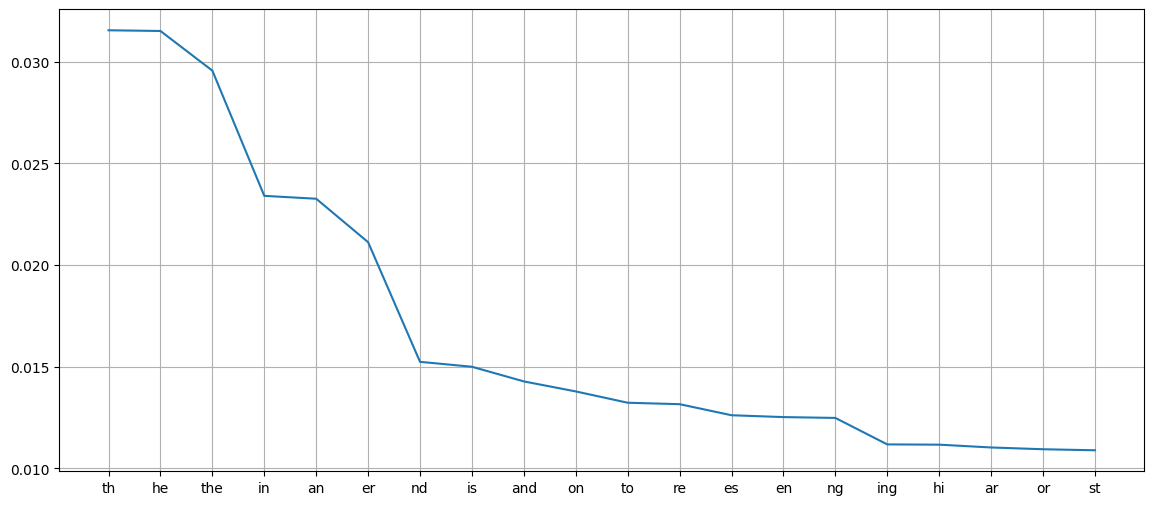

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(14,6))
plt.plot(counts)
plt.xticks(range(maxused),ngrams)
plt.grid()
print(ngrams)

Zipf-law

## Rank distance measures:

- At the same index: 0
- At different index: abs(i1-i2)
- Does not exist: Maximal value (array length)

In [ ]:
def rankDiff(profile, doc):
  assert len(doc)==len(profile)
  diff = 0
  for i in range(len(doc)):
    if doc[i] in profile:
      j = profile.index(doc[i])
      diff += abs(i-j)
    else:
      diff += len(profile)
  
  return diff

In [ ]:
maxused = 250
thr_profile, _ = getTopNgramSignature(thr_text, 2,5, maxused)
act_profile, _ = getTopNgramSignature(act_text, 2,5, maxused)
west_profile, _ = getTopNgramSignature(west_text, 2,5, maxused)

In [ ]:
def categorize(doc_profile):
  distances = np.array([rankDiff(thr_profile, doc_profile), rankDiff(act_profile, doc_profile), rankDiff(west_profile, doc_profile)])
  genres = ["thriller","action","western"]
  bestidx = np.argmin(distances)
  return genres[bestidx], distances

In [ ]:
#Spider-Man 2021
doc = "With Spider-Man's identity now revealed, Peter asks Doctor Strange for help. When a spell goes wrong, dangerous foes from other worlds start to appear, forcing Peter to discover what it truly means to be Spider-Man."
doc_profile, _ = getTopNgramSignature(doc, 2,5, maxused)
categorize(doc_profile)

('action', array([51753, 50941, 51152]))

In [ ]:
#The Power of The Dog 2021
doc = "Charismatic rancher Phil Burbank inspires fear and awe in those around him. When his brother brings home a new wife and her son, Phil torments them until he finds himself exposed to the possibility of love."
doc_profile, _ = getTopNgramSignature(doc, 2,5, maxused)
categorize(doc_profile)

('western', array([51569, 51450, 50377]))

In [ ]:
#Scream 2022
doc = "Twenty-five years after the original series of murders in Woodsboro, a new Ghostface emerges, and Sidney Prescott must return to uncover the truth."
doc_profile, _ = getTopNgramSignature(doc, 2,5, maxused)
categorize(doc_profile)

('thriller', array([52240, 52801, 52673]))